## About The Dataset

 - The "Framingham" heart disease dataset includes over 4,240 records,16 columns and 15 attributes. The goal of the dataset is to predict whether the patient has 10-year risk of future (CHD) coronary heart disease

### Phase 1 EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
data_path = os.path.join('..', 'data', 'raw', 'framingham.csv')
data = pd.read_csv(data_path)


In [5]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
data.loc[data['diabetes'] == 1].head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
37,1,52,1.0,0,0.0,0.0,0,1,1,178.0,160.0,98.0,40.11,75.0,225.0,0
44,0,53,3.0,0,0.0,1.0,0,1,1,311.0,206.0,92.0,21.51,76.0,215.0,1
56,0,54,1.0,1,9.0,0.0,0,0,1,266.0,114.0,76.0,17.61,88.0,55.0,0
66,0,62,1.0,0,0.0,0.0,0,1,1,212.0,190.0,99.0,29.64,100.0,202.0,0
96,0,63,4.0,1,20.0,0.0,0,0,1,239.0,134.0,80.0,26.64,88.0,126.0,0


# Columns Explanation

- **male**  
  - 1 = Male  
  - 0 = Female  

- **age**  
  - Age (in years)  

- **education**  
  - Education level (coded):  
    - 1 = Some high school  
    - 2 = High school graduate  
    - 3 = Some college  
    - 4 = College/University graduate  

- **currentSmoker**  
  - 1 = Current smoker  
  - 0 = Non-smoker  

- **cigsPerDay**  
  - Number of cigarettes per day (if currentSmoker = 1)  

- **BPMeds**  
  - Taking blood pressure medication:  
    - 1 = Yes  
    - 0 = No  

- **prevalentStroke**  
  - History of stroke:  
    - 1 = Yes  
    - 0 = No  

- **prevalentHyp**  
  - Hypertension (chronic high blood pressure):  
    - 1 = Yes  
    - 0 = No  

- **diabetes**  
  - 1 = Has diabetes  
  - 0 = Does not have diabetes  

- **totChol** (Total cholesterol, mg/dL)  
  - Normal: < 200  
  - Borderline high: 200–239  
  - High: ≥ 240  

- **sysBP** (Systolic blood pressure)  
  - Normal: < 120  
  - Elevated: 120–129  
  - Hypertension Stage 1: 130–139  
  - Hypertension Stage 2: ≥ 140  

- **diaBP** (Diastolic blood pressure)  
  - Normal: < 80  
  - Elevated: 80–89  
  - Hypertension Stage 2: ≥ 90  

- **BMI** (Body Mass Index)  
  - Underweight: < 18.5  
  - Normal: 18.5–24.9  
  - Overweight: 25–29.9  
  - Obese: ≥ 30  

- **heartRate** (Beats per minute)  
  - Normal resting range: 60–100  

- **glucose** (Blood glucose, mg/dL, fasting)  
  - Normal: < 100  
  - Prediabetes: 100–125  
  - Diabetes: ≥ 126  

- **TenYearCHD** (10-year risk of coronary heart disease)  
  - 1 = Risk present (likely CHD within 10 years)  
  - 0 = No risk predicted  


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [8]:
data.shape

(4240, 16)

In [9]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Overall Interpretation

- The population is **middle-aged (32–70)**, almost half male.  
- About **50% smoke**, with a subgroup smoking heavily (**20+ cigs/day**).  
- Around **31% hypertensive** and **3% diabetic**.  
- **Cholesterol and blood pressure are generally high**, indicating cardiovascular risk factors.  
- **Average BMI ≈ 26** → slightly overweight overall.  
- About **15%** actually had **CHD events within 10 years**, aligning with the dataset’s goal (predicting CHD risk).


#### Remove the duplicates

In [10]:
duplicate = data.duplicated()
data = data[~duplicate]

In [11]:
missing_values = data.isnull().sum()

print(missing_values)


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [13]:
data['MAP'] = (2 * data['diaBP'] + data['sysBP']) / 3

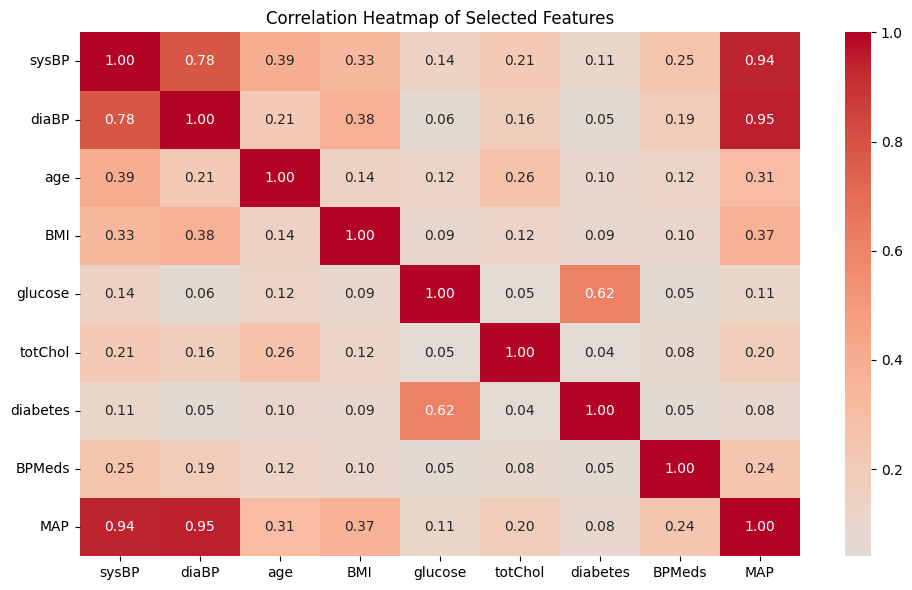

In [14]:
selected_columns = ['sysBP', 'diaBP', 'age', 'BMI', 'glucose','totChol','diabetes', 'BPMeds', 'MAP']
corr_subset = data[selected_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.tight_layout()
plt.show()

In [15]:
log_reg_features = data.copy()

log_reg_features.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'MAP'],
      dtype='object')

In [16]:
rand_for_features = data.copy()

In [17]:
data['Age_Group'] = pd.cut(
    data['age'],
    bins=[29, 39, 49, 59, 70],
    labels=['Young Adult (30–39)', 'Middle Age I (40–49)', 'Middle Age II (50–59)', 'Senior (60–70)']
)

log_reg_features['Age_Group'] = data['Age_Group']


In [18]:
data['HeavySmoker'] = (data['cigsPerDay'] > 20).astype(int)
data['PackYears'] = (data['cigsPerDay'] / 20) * (data['age'] - 18)
data['glucose_missing'] = data['glucose'].isnull().astype(int)

In [19]:
data['glucose_missing'].value_counts()

glucose_missing
0    3852
1     388
Name: count, dtype: int64

In [20]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'MAP',
       'Age_Group', 'HeavySmoker', 'PackYears', 'glucose_missing'],
      dtype='object')

C:\Users\HP\AppData\Local\Temp\ipykernel_37556\880277114.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='outlier_IF', data=data, palette='viridis')


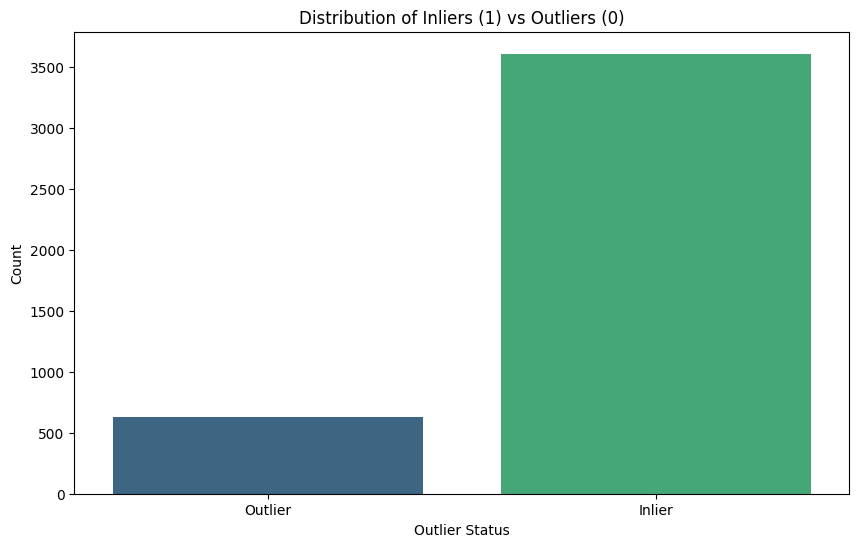

Percentage of observations detected as outliers: 14.83%


In [21]:
from sklearn.ensemble import IsolationForest

features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', "BMI", 'MAP', 'heartRate', 'PackYears']
X = data[features].dropna()

clf = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
outliers = clf.fit_predict(X)

data['outlier_IF'] = 0
data.loc[X.index, 'outlier_IF'] = (outliers == 1).astype(int)

plt.figure(figsize=(10, 6))
sns.countplot(x='outlier_IF', data=data, palette='viridis')
plt.title('Distribution of Inliers (1) vs Outliers (0)')
plt.xlabel('Outlier Status')
plt.xticks([0, 1], ['Outlier', 'Inlier'])
plt.ylabel('Count')
plt.show()

pct_outliers = (data['outlier_IF'] == 0).mean() * 100
print(f"Percentage of observations detected as outliers: {pct_outliers:.2f}%")

In [22]:
outlier_count = (data['outlier_IF'] == 0).sum()
print(f"Number of outliers: {outlier_count}")

Number of outliers: 629


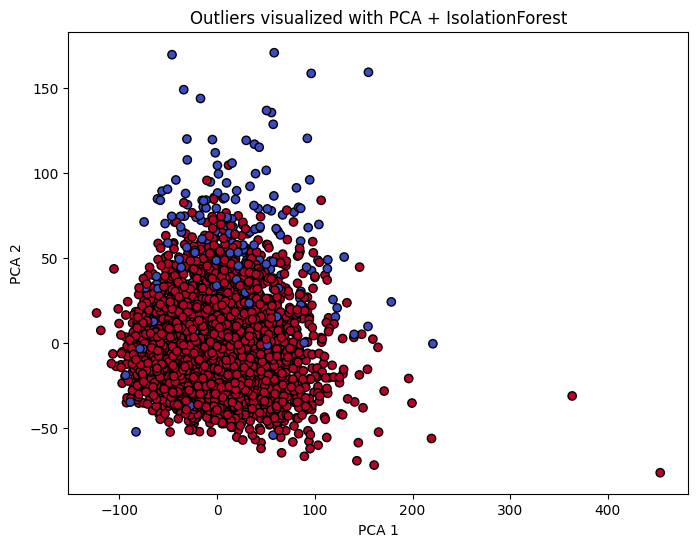

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

outlier_colors = data.loc[X.index, 'outlier_IF']

plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:,0], X_pca[:,1],
    c=outlier_colors,
    cmap='coolwarm', edgecolor='k'
)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Outliers visualized with PCA + IsolationForest")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_37556\1347909268.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='outlier_count', data=data, palette='viridis')


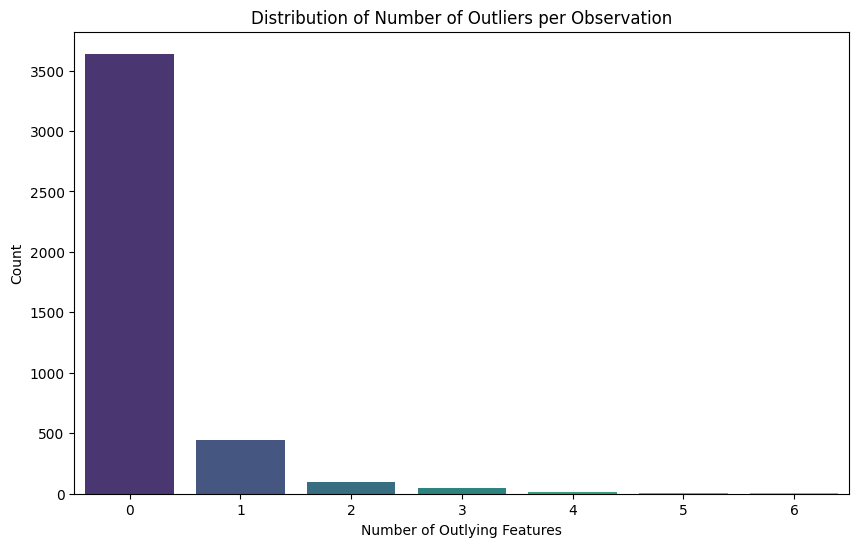

Percentage of observations with at least one outlier: 14.17%


In [24]:
outlier_flags = pd.DataFrame(index=data.index)


for col in features:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_flags[col] = (data[col] < lower_bound) | (data[col] > upper_bound)

data['outlier_count'] = outlier_flags.sum(axis=1)

plt.figure(figsize=(10, 6))
sns.countplot(x='outlier_count', data=data, palette='viridis')
plt.title('Distribution of Number of Outliers per Observation')
plt.xlabel('Number of Outlying Features')
plt.ylabel('Count')
plt.show()

pct_outliers = (data['outlier_count'] > 0).mean() * 100
print(f"Percentage of observations with at least one outlier: {pct_outliers:.2f}%")

In [25]:
data.loc[data['outlier_count'] > 0, 'outlier_count'].value_counts().sum()

np.int64(601)

In [26]:
useful_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 
                 'heartRate', 'glucose', 'MAP', 'PackYears', 'outlier_count']

clean_data = data[useful_columns].copy()

clean_data.nlargest(10, 'outlier_count')

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,MAP,PackYears,outlier_count
833,53,0.0,248.0,200.0,140.0,43.30,107.0,130.0,160.000000,0.00,6
3844,62,20.0,358.0,215.0,110.0,37.62,110.0,368.0,145.000000,44.00,6
249,60,20.0,180.0,200.0,122.5,44.27,88.0,150.0,148.333333,42.00,5
2930,57,43.0,283.0,207.5,118.0,38.61,100.0,83.0,147.833333,83.85,5
4228,50,0.0,260.0,190.0,130.0,43.67,85.0,260.0,150.000000,0.00,5
259,60,0.0,352.0,197.5,105.0,36.29,75.0,95.0,135.833333,0.00,4
414,55,3.0,323.0,197.0,118.0,27.51,80.0,112.0,144.333333,5.55,4
481,64,0.0,253.0,295.0,135.0,38.82,92.0,70.0,188.333333,0.00,4
531,61,0.0,217.0,189.0,121.0,37.41,85.0,100.0,143.666667,0.00,4
864,59,0.0,264.0,244.0,124.0,19.61,76.0,120.0,164.000000,0.00,4


In [27]:
clean_data.nsmallest(10, 'outlier_count')

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,MAP,PackYears,outlier_count
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,82.000000,0.0,0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,94.333333,0.0,0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,95.833333,30.0,0
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,99.333333,32.2,0
5,43,0.0,228.0,180.0,110.0,30.30,77.0,99.0,133.333333,0.0,0
6,63,0.0,205.0,138.0,71.0,33.11,60.0,85.0,93.333333,0.0,0
7,45,20.0,313.0,100.0,71.0,21.68,79.0,78.0,80.666667,27.0,0
8,52,0.0,260.0,141.5,89.0,26.36,76.0,79.0,106.500000,0.0,0
9,43,30.0,225.0,162.0,107.0,23.61,93.0,88.0,125.333333,37.5,0
10,50,0.0,254.0,133.0,76.0,22.91,75.0,76.0,95.000000,0.0,0


In [28]:
valid_ranges = {
    'BMI': (10, 60),
    'MAP': (50, 180),
    'sysBP': (80, 250),
    'diaBP': (40, 150),
    'heartRate': (40, 200),
    'glucose': (50, 400),
    'totChol': (100, 400),
    'cigsPerDay': (0, 80),
    'PackYears': (0, 100),
    'age': (18, 100)
}

In [29]:
clean_data = data.copy()

for col, (lower, upper) in valid_ranges.items():
    clean_data = clean_data.loc[(clean_data[col] >= lower) & (clean_data[col] <= upper)]

print("The original dataset has", len(data), "rows.")
print("The cleaned dataset has", len(clean_data), "rows.")

The original dataset has 4240 rows.
The cleaned dataset has 3774 rows.


In [30]:
missing_summary = (
    clean_data.isnull().sum()
    .to_frame(name='missing_count')
    .assign(missing_pct=lambda x: 100 * x['missing_count'] / len(clean_data))
    .query("missing_count > 0")
)

print(missing_summary)


           missing_count  missing_pct
education             91     2.411235
BPMeds                51     1.351351


In [31]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'MAP',
       'Age_Group', 'HeavySmoker', 'PackYears', 'glucose_missing',
       'outlier_IF', 'outlier_count'],
      dtype='object')

C:\Users\HP\AppData\Local\Temp\ipykernel_37556\1579636592.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=clean_data, palette='viridis')


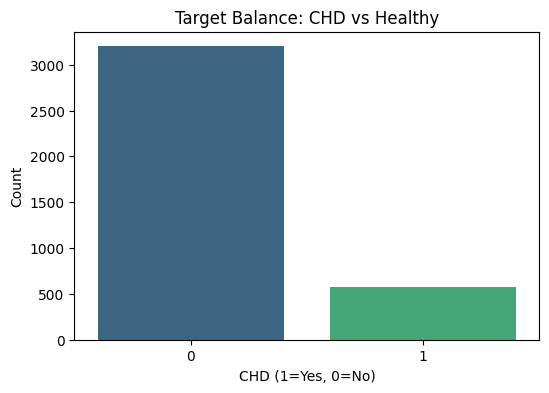

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='TenYearCHD', data=clean_data, palette='viridis')

plt.title('Target Balance: CHD vs Healthy')
plt.xlabel('CHD (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()


### Phase 2 Correlation Analysis & Multicollinearity Check (VIF)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


X = clean_data[['age', 'BMI', 'MAP', 'totChol', 'glucose']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

print(vif_data)

   feature        VIF
0      age  37.408362
1      BMI  41.382134
2      MAP  55.539997
3  totChol  30.860296
4  glucose  12.523234


C:\Users\HP\AppData\Local\Temp\ipykernel_37556\785626432.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='feature', data=vif_data.sort_values('VIF', ascending=False), palette='viridis')


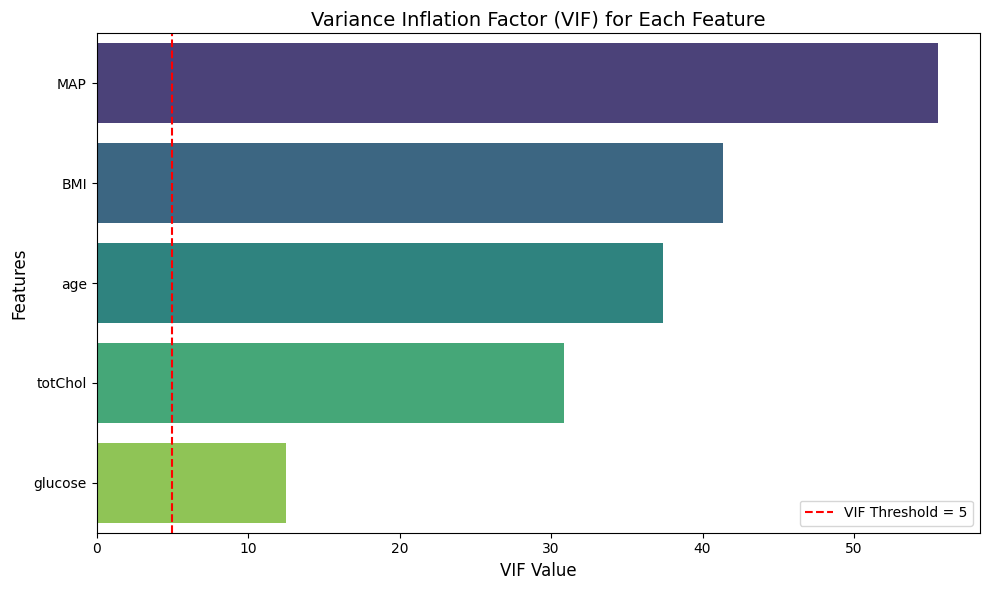

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='feature', data=vif_data.sort_values('VIF', ascending=False), palette='viridis')
plt.title('Variance Inflation Factor (VIF) for Each Feature', fontsize=14)
plt.xlabel('VIF Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(x=5, color='red', linestyle='--', label='VIF Threshold = 5')
plt.legend()
plt.tight_layout()
plt.show()

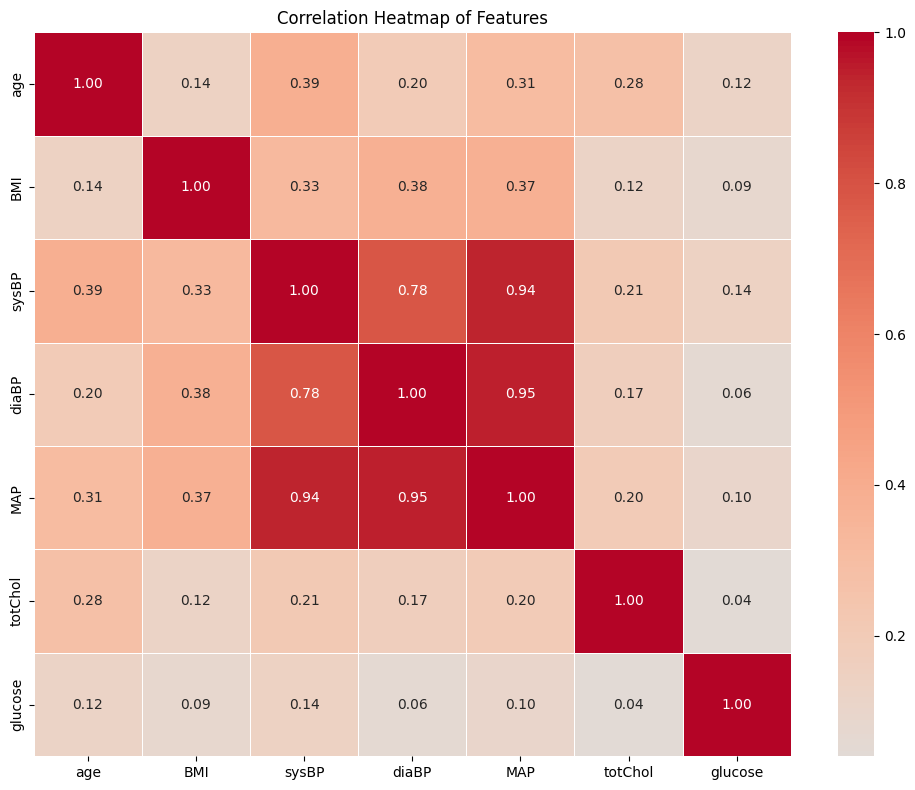


Highly correlated feature pairs (|correlation| > 0.7):
Feature 1 Feature 2  Correlation
      MAP     diaBP     0.949292
    diaBP       MAP     0.949292
      MAP     sysBP     0.939589
    sysBP       MAP     0.939589
    sysBP     diaBP     0.784327
    diaBP     sysBP     0.784327


In [35]:
correlation_matrix = clean_data[['age', 'BMI', 'sysBP', 'diaBP', 'MAP', 'totChol', 'glucose']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

high_corr = (correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1.0)
high_corr_pairs = correlation_matrix.where(high_corr).stack().reset_index()
high_corr_pairs = high_corr_pairs[high_corr_pairs[0] != 0] 
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs.sort_values('Correlation', ascending=False)

print("\nHighly correlated feature pairs (|correlation| > 0.7):")
print(high_corr_pairs.to_string(index=False))

. Correlation Analysis

Strong correlations were observed among the blood pressure features:

MAP ↔ diaBP = 0.95

MAP ↔ sysBP = 0.94

sysBP ↔ diaBP = 0.78
This indicates very strong multicollinearity since MAP is mathematically derived from sysBP and diaBP.

Moderate correlations were found between:

glucose ↔ diabetes = 0.62 (logical relationship).

BMI ↔ diaBP = 0.38 and age ↔ sysBP = 0.39 (expected physiological patterns).

Other variables showed weak correlations (<0.3), which are not concerning.

| Feature     | VIF Value | Interpretation                                                    |
| ----------- | --------- | ----------------------------------------------------------------- |
| **MAP**     | 55.5      | Extremely high multicollinearity with sysBP/diaBP.                |
| **BMI**     | 41.3      | Very high collinearity, possibly with age and other risk factors. |
| **age**     | 37.4      | High collinearity, overlapping effects with BMI and cholesterol.  |
| **totChol** | 30.9      | High collinearity, related to age and BMI.                        |
| **glucose** | 12.5      | Above threshold (10), likely correlated with diabetes indicator.  |

### Phase 3 Feature Distributions & Normality Tests

C:\Users\HP\AppData\Local\Temp\ipykernel_37556\3531566674.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, data=clean_data, palette="Blues");


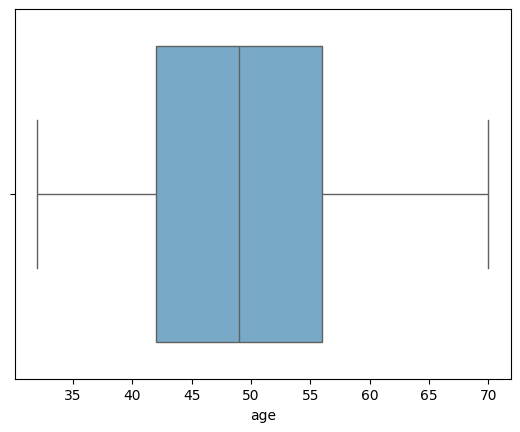

C:\Users\HP\AppData\Local\Temp\ipykernel_37556\3531566674.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, data=clean_data, palette="Blues");


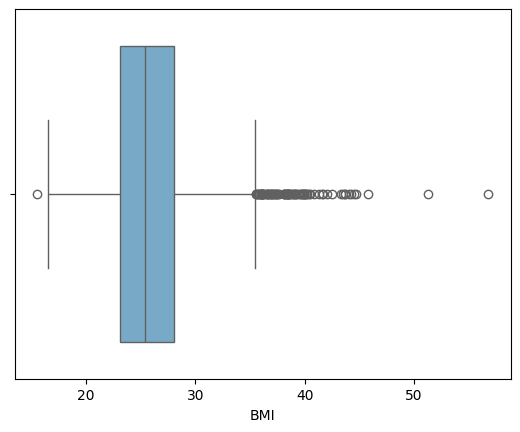

C:\Users\HP\AppData\Local\Temp\ipykernel_37556\3531566674.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, data=clean_data, palette="Blues");


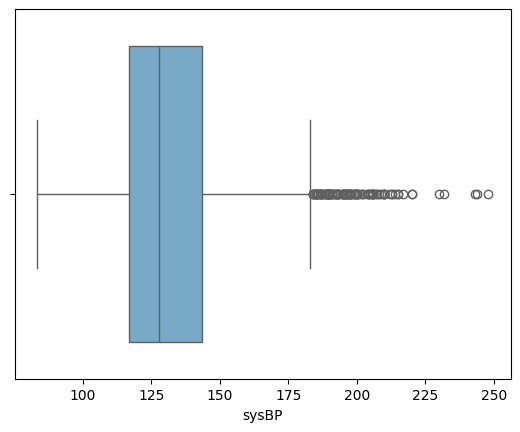

C:\Users\HP\AppData\Local\Temp\ipykernel_37556\3531566674.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, data=clean_data, palette="Blues");


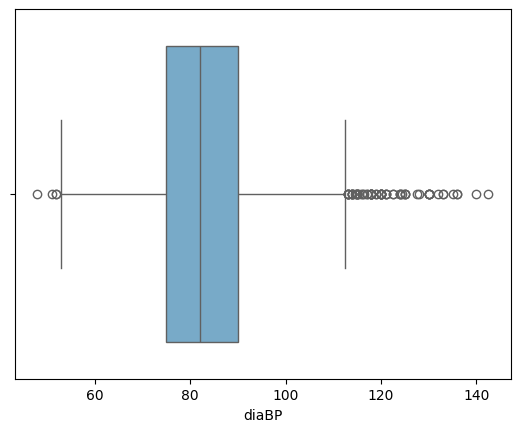

C:\Users\HP\AppData\Local\Temp\ipykernel_37556\3531566674.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, data=clean_data, palette="Blues");


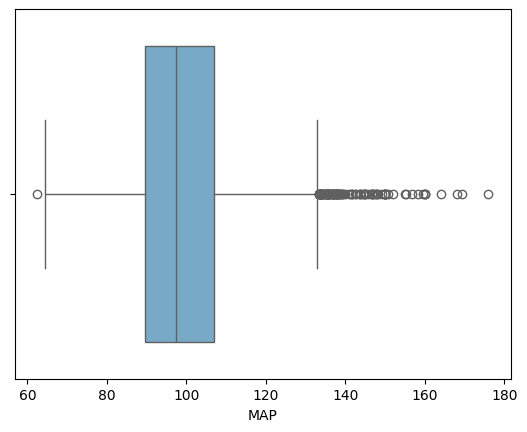

C:\Users\HP\AppData\Local\Temp\ipykernel_37556\3531566674.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, data=clean_data, palette="Blues");


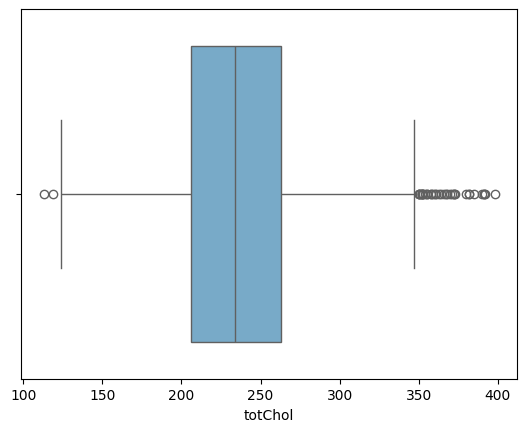

C:\Users\HP\AppData\Local\Temp\ipykernel_37556\3531566674.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, data=clean_data, palette="Blues");


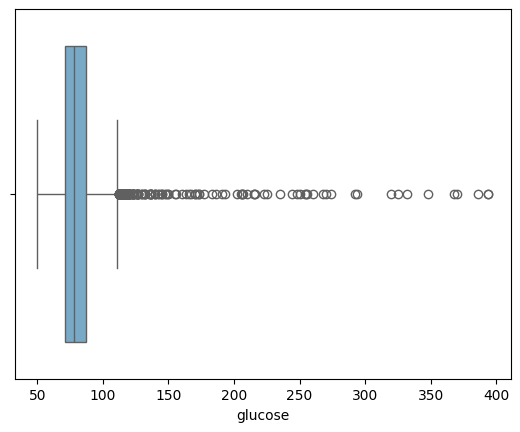

In [36]:
import seaborn as sns

data_plot = ['age', 'BMI', 'sysBP', 'diaBP', 'MAP', 'totChol', 'glucose']

for feature in data_plot:
    sns.boxplot(x=feature, data=clean_data, palette="Blues");
    plt.show()

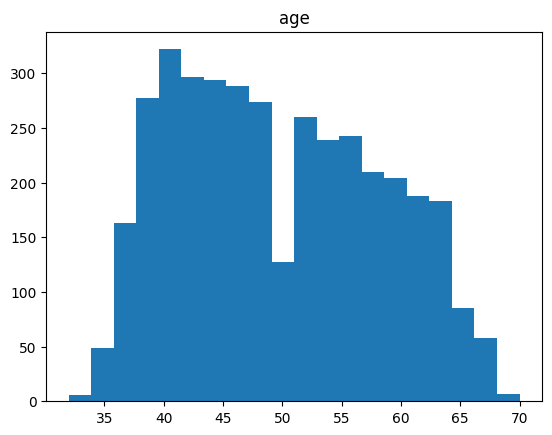

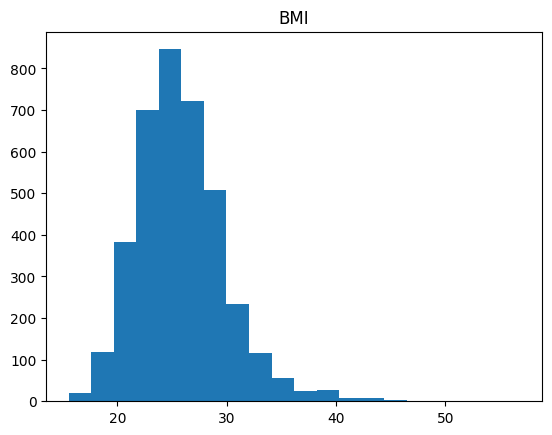

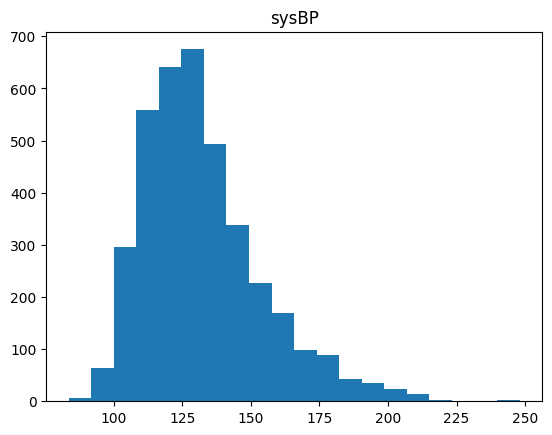

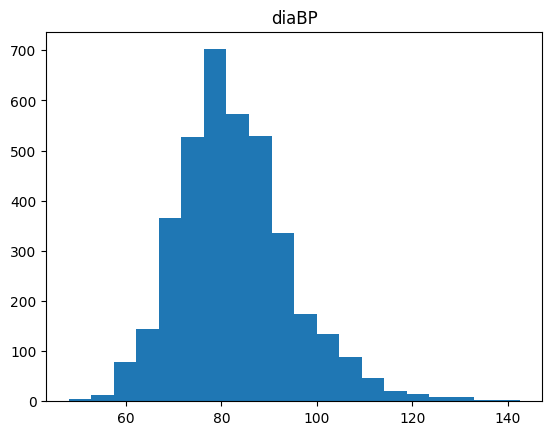

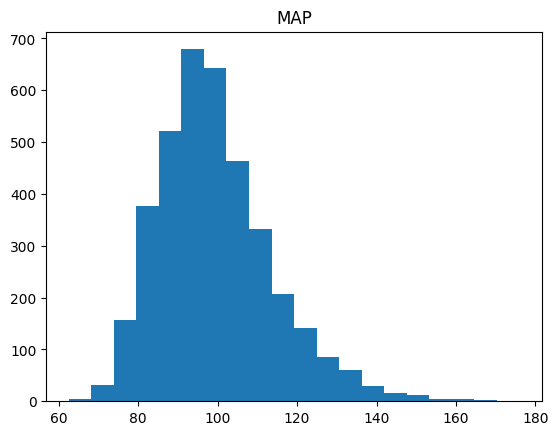

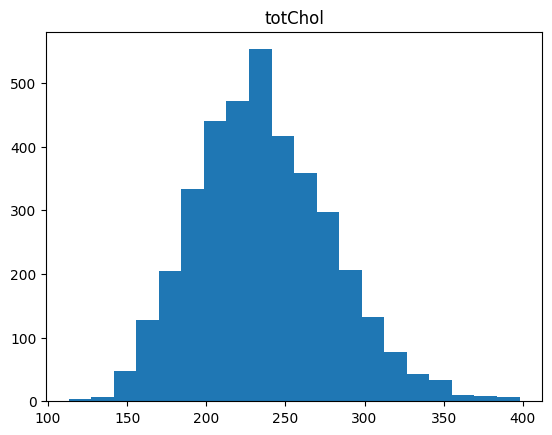

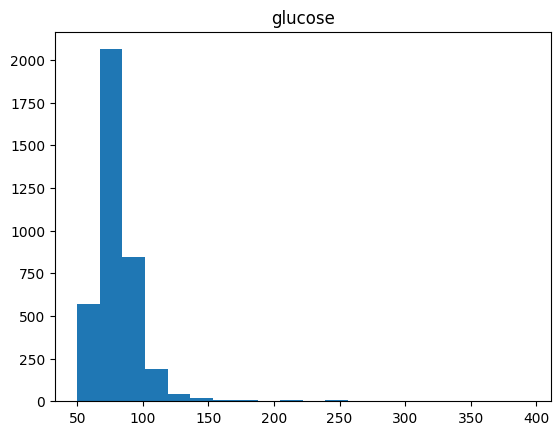

In [37]:
for feature in data_plot:
    plt.hist(clean_data[feature], bins=20)  
    plt.title(feature)
    plt.show()

In [38]:
from scipy.stats import shapiro 

for col in data_plot:
    print(f"\n{col}") 
    stat, p = shapiro(clean_data[col])
    print("W-statistic:", stat)
    print("p-value:", p)
    if p > 0.05:
        print("Conclusion: The data is normally distributed")
    else:
        print("Conclusion: The data is not normally distributed")
    print("\n" + "="*50 + "\n")


age
W-statistic: 0.9668691047513102
p-value: 1.2217872191483487e-28
Conclusion: The data is not normally distributed



BMI
W-statistic: 0.9574992167002978
p-value: 7.348912792233615e-32
Conclusion: The data is not normally distributed



sysBP
W-statistic: 0.9381638777508633
p-value: 4.742408073520228e-37
Conclusion: The data is not normally distributed



diaBP
W-statistic: 0.9738113097539338
p-value: 9.160375264832172e-26
Conclusion: The data is not normally distributed



MAP
W-statistic: 0.9601559881843491
p-value: 5.2280841466447e-31
Conclusion: The data is not normally distributed



totChol
W-statistic: 0.990240201505203
p-value: 1.8897705382914762e-15
Conclusion: The data is not normally distributed



glucose
W-statistic: 0.5566195157610379
p-value: 4.566166536423604e-71
Conclusion: The data is not normally distributed




| Feature | Test Used | p-value  | Interpretation             |
| ------- | --------- | -------- | -------------------------- |
| Age     | Shapiro   | 1.22e-28 | Not Normal                 |
| BMI     | Shapiro   | 7.34e-32 | Not Normal                 |
| sysBP   | Shapiro   | 4.74e-37 | Not Normal                 |
| diaBP   | Shapiro   | 9.16e-26 | Not Normal                 |
| MAP     | Shapiro   | 5.22e-31 | Not Normal                 |
| totChol | Shapiro   | 1.88e-15 | Not Normal                 |
| glucose | Shapiro   | 4.56e-71 | Not Normal (Highly Skewed) |


### Phase 4 Handle Imbalanced Data

In [39]:
clean_data['TenYearCHD'].value_counts(normalize=True) * 100

TenYearCHD
0    84.790673
1    15.209327
Name: proportion, dtype: float64

"The dataset is imbalanced (CHD: 15.2%, Healthy: 84.8%).
Baseline approach: use class_weight='balanced'.
Advanced approach: apply SMOTE (or SMOTENC if categorical variables included) on the training set to oversample minority class."

### Summary
- **Visualizations:**  
  - Histograms + Boxplots created for key numeric features:  
    `age, BMI, sysBP, diaBP, MAP, totChol, glucose`.
- **Observations:**  
  - All features show skewness or contain clear outliers.  
  - Glucose and blood pressure variables (sysBP, diaBP, MAP) are highly skewed.  
- **Normality Tests (Shapiro-Wilk):**  
  - Applied on all numeric features.  
  - **Result:** p-value < 0.05 for every feature → none are normally distributed.
- **Interpretation:**  
  - Data is skewed and contains outliers.  
  - Future analysis should consider **non-parametric tests** or transformations (log/Box-Cox).

### Handle Imbalanced Data
- **Target Balance:**  
  - TenYearCHD distribution ≈ **15% positive cases vs 85% negative cases**.  
- **Plan:**  
  - **Baseline:** Use Logistic Regression with `class_weight='balanced'`.  
  - **Advanced:** Consider SMOTE or resampling methods in later stages.  
- **Note:**  
  - Accuracy alone is not reliable for evaluation.  
  - Will focus on **F1-score, ROC-AUC, Precision, Recall**.

---

### Day 2 Outcome
- Feature distributions plotted.  
- Normality tested with Shapiro-Wilk.  
- Class imbalance documented with handling strategy prepared.



In [40]:
clean_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,heartRate,glucose,TenYearCHD,MAP,Age_Group,HeavySmoker,PackYears,glucose_missing,outlier_IF,outlier_count
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,...,80.0,77.0,0,82.000000,Young Adult (30–39),0,0.0,0,1,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,...,95.0,76.0,0,94.333333,Middle Age I (40–49),0,0.0,0,1,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,...,75.0,70.0,0,95.833333,Middle Age I (40–49),0,30.0,0,1,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,...,65.0,103.0,1,113.333333,Senior (60–70),1,64.5,0,1,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,...,85.0,85.0,0,99.333333,Middle Age I (40–49),1,32.2,0,1,0


In [41]:
clean_data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,BMI,heartRate,glucose,TenYearCHD,MAP,HeavySmoker,PackYears,glucose_missing,outlier_IF,outlier_count
count,3774.000000,3774.000000,3683.000000,3774.000000,3774.000000,3723.000000,3774.000000,3774.000000,3774.000000,3774.000000,...,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.0,3774.000000,3774.000000
mean,0.441971,49.607578,1.981265,0.486751,8.939852,0.030352,0.005829,0.311341,0.027027,236.334128,...,25.803797,75.684685,81.992581,0.152093,99.386857,0.108373,13.116455,0.0,0.951510,0.197138
std,0.496687,8.583477,1.024378,0.499891,11.818458,0.171577,0.076137,0.463103,0.162184,42.823857,...,4.059154,11.929721,23.756193,0.359159,14.418251,0.310892,18.083233,0.0,0.214827,0.575433
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,...,15.540000,44.000000,50.000000,0.000000,62.500000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,...,23.082500,68.000000,71.000000,0.000000,89.666667,0.000000,0.000000,0.0,1.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,...,25.400000,75.000000,78.000000,0.000000,97.333333,0.000000,0.000000,0.0,1.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,...,28.040000,82.000000,87.000000,0.000000,107.000000,0.000000,24.000000,0.0,1.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,398.000000,...,56.800000,143.000000,394.000000,1.000000,176.000000,1.000000,98.000000,0.0,1.000000,6.000000


In [43]:
clean_data.select_dtypes(include="number").corr()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,BMI,heartRate,glucose,TenYearCHD,MAP,HeavySmoker,PackYears,glucose_missing,outlier_IF,outlier_count
male,1.000000,-0.026884,0.019973,0.202924,0.323207,-0.050960,-0.005070,0.001940,0.016184,-0.076688,...,0.077735,-0.117151,0.004007,0.095546,0.006423,0.263012,0.324572,NaN,0.004672,-0.027659
age,-0.026884,1.000000,-0.157990,-0.215583,-0.199553,0.131783,0.054601,0.305384,0.107385,0.277109,...,0.135719,-0.007157,0.121072,0.232837,0.308601,-0.100364,-0.019241,NaN,-0.112948,0.184215
education,0.019973,-0.157990,1.000000,0.026321,0.016157,-0.012749,-0.032984,-0.075313,-0.041215,-0.012453,...,-0.137408,-0.060910,-0.035113,-0.061711,-0.090775,0.026873,-0.006702,NaN,0.070647,-0.080718
currentSmoker,0.202924,-0.215583,0.026321,1.000000,0.776850,-0.050490,-0.039752,-0.108687,-0.044619,-0.055229,...,-0.162304,0.053031,-0.057411,0.021560,-0.133380,0.357997,0.744917,NaN,-0.039302,-0.002896
cigsPerDay,0.323207,-0.199553,0.016157,0.776850,1.000000,-0.045390,-0.037312,-0.075172,-0.038698,-0.034145,...,-0.092639,0.070121,-0.057392,0.056229,-0.083818,0.730909,0.950827,NaN,-0.098755,0.073025
BPMeds,-0.050960,0.131783,-0.012749,-0.050490,-0.045390,1.000000,0.112111,0.264142,0.057765,0.089963,...,0.106144,0.007756,0.052642,0.082649,0.249870,-0.026365,-0.030452,NaN,-0.148678,0.193930
prevalentStroke,-0.005070,0.054601,-0.032984,-0.039752,-0.037312,0.112111,1.000000,0.068783,0.008702,0.017855,...,0.031016,-0.021320,0.024349,0.054800,0.057701,-0.026696,-0.029176,NaN,-0.015122,0.028209
prevalentHyp,0.001940,0.305384,-0.075313,-0.108687,-0.075172,0.264142,0.068783,1.000000,0.078492,0.160325,...,0.303076,0.139820,0.087348,0.175746,0.694315,-0.013509,-0.033962,NaN,-0.247825,0.274865
diabetes,0.016184,0.107385,-0.041215,-0.044619,-0.038698,0.057765,0.008702,0.078492,1.000000,0.028809,...,0.100034,0.060844,0.621713,0.093215,0.080213,-0.026567,-0.023964,NaN,-0.160160,0.283688
totChol,-0.076688,0.277109,-0.012453,-0.055229,-0.034145,0.089963,0.017855,0.160325,0.028809,1.000000,...,0.121426,0.083781,0.040206,0.088008,0.203005,-0.003537,-0.004458,NaN,-0.008581,0.107796


In [47]:
clean_data.to_csv("../data/processed/eda_cleaned.csv", index=False)

# 01 – Exploratory Data Analysis (EDA)

## ✦ MT1.1 | Basic Exploration
- Loaded raw dataset (`framingham.csv`).
- Reviewed dataset structure (shape, dtypes).
- Calculated descriptive statistics (mean, std, min, max).
- Checked missing values per feature.

---

## ✦ MT1.4 | Correlation & Multicollinearity
- Generated correlation matrix and heatmap.
- Identified strong correlations (e.g., sysBP ↔ diaBP ↔ MAP).
- Calculated Variance Inflation Factor (VIF).
- Documented potential multicollinearity among blood pressure variables.

---

## ✦ MT1.5 | Feature Distributions & Normality Tests
- Plotted histograms and boxplots for main numeric features:  
  `age, BMI, sysBP, diaBP, MAP, totChol, glucose`.
- Observed skewness and outliers (especially in glucose and blood pressure).
- Applied **Shapiro-Wilk test** for normality.  
  - **Result:** All features have p-value < 0.05 → none are normally distributed.
- Interpretation: data is skewed, contains outliers → non-parametric tests or transformations may be needed later.

---

## ✦ MT1.6 | Class Imbalance Check
- Analyzed target distribution (`TenYearCHD`).  
  - ~15% positive (CHD cases) vs ~85% negative (Healthy).  
- Planned handling strategy:  
  - **Baseline:** Use `class_weight="balanced"` in Logistic Regression.  
  - **Advanced:** Consider SMOTE or resampling later.
- Noted that accuracy is not sufficient; will rely on F1-score, ROC-AUC, Precision, Recall.

---

## ✦ Outlier Analysis
- Used IsolationForest and outlier count method.
- Found ~14.8% of samples flagged as outliers.
- Derived new features:  
  - `outlier_IF` (binary flag).  
  - `outlier_count` (number of features marked as outliers).
- Decision: keep these features for now, to evaluate later in modeling.

---

## ✦ Feature Engineering
- Created new features:  
  - `MAP` (Mean Arterial Pressure).  
  - `PackYears` (smoking exposure).  
  - `HeavySmoker` (binary flag).  
  - `Age_Group` (categorical bins).  
  - `glucose_missing` (indicator for missing glucose).

---

## ✅ Outcome of EDA
- Dataset explored, distributions analyzed, normality tested.  
- Class imbalance documented with handling plan.  
- Outliers flagged and new features engineered.  
- Saved cleaned dataset as:  


NameError: name 'X_train' is not defined